In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.special import erfinv
from scipy.stats import skew, kurtosis
from scipy.optimize import minimize


import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.stats as stats
import numpy as np
import scipy.integrate as integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.interpolate
import matplotlib.ticker as mticker
from scipy.optimize import curve_fit
import math
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.style.use("default")
import scipy.optimize as opt

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
from scipy.special import erfinv
from scipy.stats import skew, kurtosis
from scipy.optimize import minimize

/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_6343/2042264952.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [7]:
myColors = ["#009E73", "#0072B2", "#CC79A7", "#D55E00", "#56B4E9", "#F0E442", "#E69F00", "#000000"]
colors= ["white", myColors[4], myColors[1], myColors[0], myColors[5], myColors[6], myColors[3]]
myNodes = [0.0, 0.1, 0.2, 0.35, 0.5, 0.85, 1.0]
myCmap = mpl.colors.LinearSegmentedColormap.from_list("mycmap", list(zip(myNodes, colors)))

colorsLog= ["white",  myColors[4], myColors[1], myColors[6], myColors[3], myColors[3]]
myNodesLog = [0.0, 0.1 , 0.2, 0.36, 0.6, 1]
myCmapLog = mpl.colors.LinearSegmentedColormap.from_list("mycmapLog", list(zip(myNodesLog, colorsLog)))

In [8]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams.update({
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	})
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
plt.rcParams.update({'font.size': 15})

mpl.rcParams['axes.prop_cycle'] = cycler(color=myColors)

# Task1 : Basic statistical properties


a) Vérification de la densité de probabilité f(E_ω)

La densité de probabilité est définie par :

$$
f(E_\omega) = \frac{A}{\sqrt{E_\omega}} e^{-\beta E_\omega}
$$

où :
- \( A \) est un facteur de normalisation,
- \( \beta = \frac{1}{k_B T} \) est une constante liée à la température (\( k_B \) étant la constante de Boltzmann et \( T \) la température en Kelvin).

---

 **Vérification de la positivité**

Les termes de \( f(E_\omega) \) sont :
1. \( \frac{1}{\sqrt{E_\omega}} > 0 \) pour \( E_\omega > 0 \),
2. \( e^{-\beta E_\omega} > 0 \) pour tout \( \beta > 0 \) et \( E_\omega \geq 0 \),
3. \( A > 0 \) lorsqu'il est défini correctement.

Ainsi, \( f(E_\omega) \geq 0 \) pour \( E_\omega > 0 \). La densité est donc positive.

---

 **Vérification de la normalisation**

Pour vérifier que \( f(E_\omega) \) est une densité de probabilité valide, nous devons montrer que :

$$
\int_0^{\infty} f(E_\omega) \, dE_\omega = 1
$$

Substituons \( f(E_\omega) \) :

$$
\int_0^{\infty} \frac{A}{\sqrt{E_\omega}} e^{-\beta E_\omega} \, dE_\omega = 1
$$

Simplifions :
- Le facteur \( A \) peut être sorti de l'intégrale.

$$
A \int_0^{\infty} \frac{1}{\sqrt{E_\omega}} e^{-\beta E_\omega} \, dE_\omega = 1
$$

Nous utilisons le changement de variable \( x = \beta E_\omega \), donc \( dE_\omega = \frac{dx}{\beta} \).

Les bornes restent inchangées, et l'intégrale devient :

$$
A \int_0^{\infty} \frac{\sqrt{\beta}}{\sqrt{x}} e^{-x} \frac{dx}{\beta} = 1
$$

Simplifions encore :

$$
A \cdot \frac{1}{\sqrt{\beta}} \int_0^{\infty} \frac{1}{\sqrt{x}} e^{-x} \, dx = 1
$$

L'intégrale \( \int_0^{\infty} x^{-1/2} e^{-x} \, dx = \sqrt{\pi} \) est une intégrale gamma (\( \Gamma(1/2) \)) :

$$
A \cdot \frac{\sqrt{\pi}}{\sqrt{\beta}} = 1
$$

En isolant \( A \), nous trouvons :

$$
A = \frac{\sqrt{\beta}}{\sqrt{\pi}}
$$

---

**Conclusion**

La densité de probabilité normalisée est donnée par :

$$
f(E_\omega) = \frac{\sqrt{\beta}}{\sqrt{\pi} \sqrt{E_\omega}} e^{-\beta E_\omega}
$$

Elle est :
1. Positive pour \( E_\omega > 0 \),
2. Normalisée avec \( \int_0^{\infty} f(E_\omega) \, dE_\omega = 1 \).


b) Simulation Monte-Carlo

Dans cette section, nous utilisons la méthode Monte Carlo pour :
1. Générer des échantillons \( E_\omega \) en utilisant la méthode de l'inverse.
2. Comparer l'histogramme des échantillons avec la densité analytique \( f(E_\omega) \).


/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_6343/40396197.py:20: RuntimeWarning: divide by zero encountered in divide
  return A * np.exp(-beta * eps) / np.sqrt(eps)


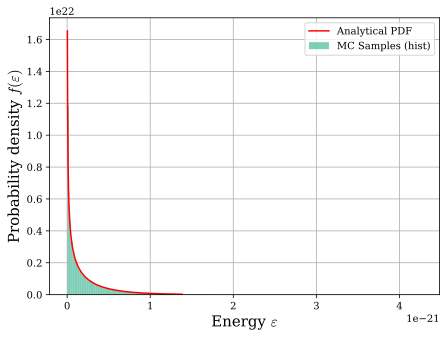

In [9]:
# Constantes physiques
m0 = 1.66e-27  # Masse atomique (kg)
K_40_mass = 40 * m0  # Masse de K-40 (kg)
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)
beta = 1 / (kb * T)  # Inverse de la température

A = np.sqrt(beta / math.pi)  # Facteur de normalisation

# Méthode de l'inverse pour générer des échantillons
def sample_energy_inverse_transform(N, beta):
    """Génère des échantillons via la méthode de l'inverse."""
    U = np.random.rand(N)
    return (erfinv(U) ** 2) / beta

# Densité de probabilité analytique
def pdf(eps, beta):
    """Densité de probabilité analytique."""
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)


# Génération des échantillons
N = 100000  # Nombre d'échantillons
energy_samples = sample_energy_inverse_transform(N, beta)

# Histogramme
bins = 200
hist, bin_edges = np.histogram(energy_samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot de l'histogram
plt.figure(figsize=(7,5), dpi=1000)
plt.bar(bin_centers, hist, width=(bin_edges[1]-bin_edges[0]),alpha=0.5, label='MC Samples (hist)')


# Plot de la densité de manière analytique
eps_grid = np.linspace(0, np.percentile(energy_samples, 99.0), 500)
pdf_values = pdf(eps_grid, beta)
plt.plot(eps_grid, pdf_values, 'r-', label='Analytical PDF')




# Tracé
plt.xlabel(r'Energy $\varepsilon$')
plt.ylabel(r'Probability density $f(\varepsilon)$')
plt.legend()
plt.grid(True)
plt.show()


## c) Calcul de la moyenne d'échantillon et comparaison avec la valeur analytique

Dans cette section, nous calculons la moyenne des échantillons et la comparons à la valeur analytique :
\[
\langle E_\omega \rangle = \frac{1}{2} k_B T
\]


In [10]:
# c) Calcul de la moyenne et comparaison avec la valeur analytique

# Moyenne analytique
analytical_mean = 0.5 * kb * T

# Moyenne des échantillons
# sample_mean = np.mean(sample_energy_inverse_transform(N, beta))
sample_mean = np.mean(energy_samples)

# Résultats
print(f"Moyenne des échantillons (methode des rejet) : {sample_mean:.5e} J")
print(f"Moyenne analytique : {analytical_mean:.5e} J")
print(f"Erreur relative : {abs(sample_mean - analytical_mean) / analytical_mean:.5e}")


# Petite correction : au lieu de "sample_mean = np.mean(sample_energy_inverse_transform(N, beta))" ---> "sample_mean = np.mean(energy_samples)" 
# car avec l'ancienne ligne on utlisait à chaque fois la fonction pour regenerer une échantillon 
# aleatoire donc ca ne correspond pas a l'échantillon du dessus (est-ce réellement demandé ainsi ?) et rend le code un peu (à peine) plus lourd.



Moyenne des échantillons (methode des rejet) : 2.07999e-22 J
Moyenne analytique : 2.07090e-22 J
Erreur relative : 4.39000e-03


d) Use another Monte Carlo method to compute <H_ω> and compare the efficiency with the
previous one.

Échantillons générés après 471615 propositions.


/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_6343/2830926954.py:5: RuntimeWarning: divide by zero encountered in divide
  return A * np.exp(-beta * eps) / np.sqrt(eps)


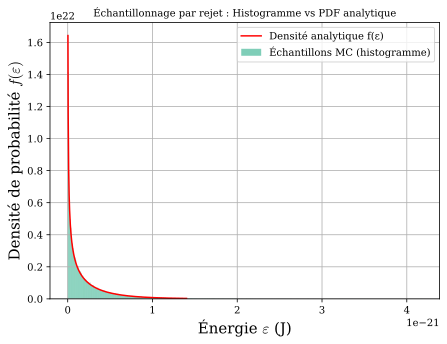

In [11]:
# --- Définitions des fonctions ---
def target_pdf(eps, beta):
    """PDF cible f(ε) = sqrt(beta/pi) * exp(-beta ε) / sqrt(ε)."""
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)

def proposal_pdf(eps, lam):
    """PDF de proposition g(ε) = λ exp(-λ ε)."""
    return lam * np.exp(-lam * eps)

def sample_from_proposal(lam, size):
    """Génère des échantillons à partir de la loi exponentielle g(ε)."""
    return np.random.exponential(1 / lam, size)

def rejection_sampling(N, beta, lam):
    """Échantillonnage par rejet avec la PDF cible f(ε) et la PDF de proposition g(ε)."""
    # --- Calcul sécurisé du facteur M ---
    eps_grid = np.linspace(1e-10, 10 / lam, 1000)  # Grille ajustée pour éviter 0
    target_vals = target_pdf(eps_grid, beta)
    proposal_vals = proposal_pdf(eps_grid, lam)
    
    # Remplace les valeurs nulles dans la PDF de proposition
    proposal_vals_safe = np.maximum(proposal_vals, 1e-10)

    # Ratio pour calculer M
    ratio = target_vals / proposal_vals_safe

    # Vérifie les ratios problématiques
    if np.any(np.isnan(ratio)) or np.any(np.isinf(ratio)):
        raise ValueError("Le ratio contient des valeurs NaN ou infinies.")

    # Calcul du facteur M
    M = 1.1 * np.max(ratio)
    #print(f"Nouveau facteur M : {M}")
    if np.isnan(M) or np.isinf(M):
        raise ValueError("Le facteur M est invalide.")
    
    # --- Échantillonnage par rejet ---
    samples = []
    total_proposals = 0
    while len(samples) < N:
        eps_proposed = sample_from_proposal(lam, 1)[0]
        total_proposals += 1
        
        # Probabilité d'acceptation
        accept_prob = target_pdf(eps_proposed, beta) / (M * proposal_pdf(eps_proposed, lam))
        if np.random.rand() < accept_prob:
            samples.append(eps_proposed)
        
        # Affichage de progression (désactivé avec commentaire)
        # if total_proposals % 10000 == 0:
        #     print(f"Propositions : {total_proposals}, Acceptés : {len(samples)}, Taux : {len(samples) / total_proposals:.2%}")
    
    print(f"Échantillons générés après {total_proposals} propositions.")
    return np.array(samples)

# --- Paramètres physiques ---
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)
beta = 1 / (kb * T)  # Inverse de la température
lam = beta * 1.5  # Réduction pour éviter un facteur M infini
N = 100000  # Nombre d'échantillons Monte Carlo

# Génère les échantillons via la méthode de rejet
samples = rejection_sampling(N, beta, lam)

# --- Tracé des résultats ---
# Histogramme des échantillons
bins = 500
hist, bin_edges = np.histogram(samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# PDF analytique
eps_grid = np.linspace(0, np.percentile(samples, 99.0), 500)
pdf_values = target_pdf(eps_grid, beta)

# Tracé
plt.figure(figsize=(7, 5))
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.5, label="Échantillons MC (histogramme)")
plt.plot(eps_grid, pdf_values, 'r-', label="Densité analytique f(ε)")
plt.xlabel(r"Énergie $\varepsilon$ (J)")
plt.ylabel(r"Densité de probabilité $f(\varepsilon)$")
plt.title("Échantillonnage par rejet : Histogramme vs PDF analytique")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# --- Calcul de la moyenne avec l'échantillonnage par rejet ---
# Moyenne des échantillons obtenus par rejet
rejection_mean = np.mean(samples)

# Moyenne analytique (calculée dans la c))
analytical_mean = 0.5 * kb * T  # Déjà définie

# Moyenne de la méthode précédente (à récupérer de la c))
#previous_mean = 2.07090e-22  # Remplacez par la valeur de la c) si nécessaire
previous_mean = sample_mean

# Comparaison des résultats
print(f"Moyenne des échantillons (méthode de Neumann (rejet)) : {rejection_mean:.5e} J")
print(f"Moyenne précédente des échantillons (methode des inverse) : {previous_mean:.5e} J")
print(f"Moyenne analytique : {analytical_mean:.5e} J")

# Erreurs relatives
error_rejection_analytical = abs(rejection_mean - analytical_mean) / analytical_mean
error_previous_analytical = abs(previous_mean - analytical_mean) / analytical_mean


print(f"Erreur relative (Neumann vs analytique) : {error_rejection_analytical:.3%}")
print(f"Erreur relative (Inverse vs analytique) : {error_previous_analytical:.3%}")


# Discussion sur l'efficacité
print("\n--- Discussion sur l'efficacité ---")
print("La méthode par rejet peut avoir un temps de calcul plus long si le facteur M est élevé.")
print("Comparez le temps total de calcul et les taux de convergence pour évaluer l'efficacité réelle.")





Moyenne des échantillons (méthode de Neumann (rejet)) : 2.17534e-22 J
Moyenne précédente des échantillons (methode des inverse) : 2.07999e-22 J
Moyenne analytique : 2.07090e-22 J
Erreur relative (Neumann vs analytique) : 5.043%
Erreur relative (Inverse vs analytique) : 0.439%

--- Discussion sur l'efficacité ---
La méthode par rejet peut avoir un temps de calcul plus long si le facteur M est élevé.
Comparez le temps total de calcul et les taux de convergence pour évaluer l'efficacité réelle.


e) Compute the variance, skewness and kurtosis of the distribution and comment. 

Compute the variance, skewness and kurtosis of the distribution and comment.

In [13]:
N = 1000000
beta = 1/(kb*T)
lam = beta

def compute_statistics(samples):
    """Compute mean, variance, skewness, and kurtosis of the energy samples."""
    mean = np.mean(samples)  
    variance = np.var(samples)
    skewness = skew(samples)  
    kurt = kurtosis(samples, fisher=False)  
    
    return mean, variance, skewness, kurt

mean_Inverse, variance_Inverse, skewness_Inverse, kurt_Inverse = compute_statistics(sample_energy_inverse_transform(N, beta))

mean_Neumann, variance_Neumann, skewness_Neumann, kurt_Neumann = compute_statistics(rejection_sampling(N, beta, lam))



print(f"Mean (⟨E⟩): {mean_Inverse:.5e} J")
print(f"Variance: {variance_Inverse:.5e} J^2")
print(f"Skewness: {skewness_Inverse:.5f}")
print(f"Kurtosis: {kurt_Inverse:.5f}\n\n")


print(f"Mean (⟨E⟩): {mean_Neumann:.5e} J")
print(f"Variance: {variance_Neumann:.5e} J^2")
print(f"Skewness: {skewness_Neumann:.5f}")
print(f"Kurtosis: {kurt_Neumann:.5f}")

Échantillons générés après 1000018 propositions.
Mean (⟨E⟩): 2.06455e-22 J
Variance: 8.53826e-44 J^2
Skewness: 2.82904
Kurtosis: 14.95431


Mean (⟨E⟩): 4.14709e-22 J
Variance: 1.71703e-43 J^2
Skewness: 1.98794
Kurtosis: 8.84827


 ## Task 2 : Convergence


In [14]:
#@author: aidanmcgregor

# --- import des bibliothèques nécessaires ---
#fait, c.f. en haut

# --- Paramètres globaux ---
m0 = 1.66e-27  # Masse atomique (kg)
K_40_mass = 40 * m0  # Masse atomique du potassium-40
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)

beta = 1 / (kb * T)  # Inverse de la température

# --- Définition des fonctions nécessaires ---
def target_pdf(eps, beta):
    """PDF cible f(ε)."""
    A = np.sqrt(beta / math.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)

def rejection_sampling(N, beta):
    """Échantillonnage par rejet pour f(ε)."""
    lam = beta  # Choix de λ = β
    M = np.sqrt(np.pi / beta)  # Facteur d'échelle

    samples = []
    upper_bound = 2e-21
    while len(samples) < N:
        eps_proposed = np.random.gamma(0.5, 1 / lam)
        if eps_proposed < upper_bound:
            accept_prob = target_pdf(eps_proposed, beta) / (M * lam * np.exp(-lam * eps_proposed) / np.sqrt(eps_proposed))
            if np.random.rand() < accept_prob:
                samples.append(eps_proposed)
    return np.array(samples)

def compute_statistics(samples):
    """Calcule la moyenne, la variance, l'asymétrie et le kurtosis."""
    mean = np.mean(samples)
    variance = np.var(samples)
    skewness = skew(samples)
    kurt = kurtosis(samples, fisher=False)
    return mean, variance, skewness, kurt


a) Take Nexp = 1 and show the law of large numbers based on the data points you generated.

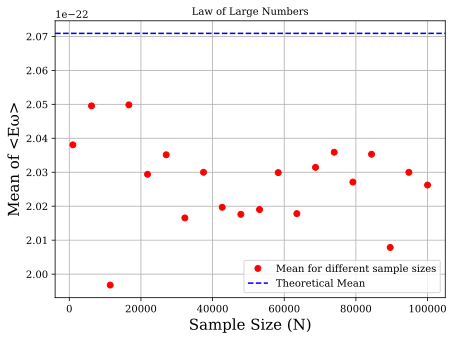

In [15]:
 #Montrer la loi des grands nombres avec N_exp = 1

LLN_x = np.linspace(1000, 100000, 20)
LLN_y = [np.mean(rejection_sampling(int(n), beta)) for n in LLN_x]

plt.figure(figsize=(7, 5))
plt.plot(LLN_x, LLN_y, 'ro', label='Mean for different sample sizes')
plt.axhline(y=2.07090e-22, color='b', linestyle='--', label='Theoretical Mean')
plt.xlabel("Sample Size (N)")
plt.ylabel("Mean of <Eω>")
plt.title("Law of Large Numbers")
plt.legend()
plt.grid(True)
plt.show()

b) Take N_exp >> 1 and show the validity of the central limit theorem for <E_ω>.

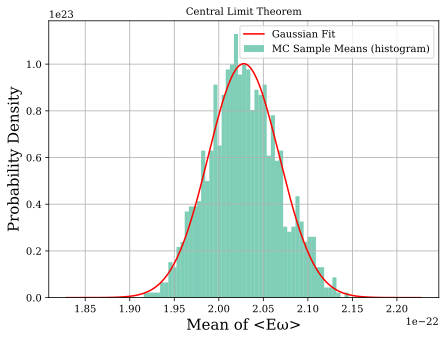

In [16]:
# Montrer la validité du théorème central limite avec N_exp ≫ 1

N_exp = 1000
sample_size = 5000
CLT_means = [np.mean(rejection_sampling(sample_size, beta)) for _ in range(N_exp)]

# Histogramme des moyennes
hist, bin_edges = np.histogram(CLT_means, bins=50, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.figure(figsize=(7, 5))
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.5, label='MC Sample Means (histogram)')

# Comparaison avec une courbe gaussienne
CLT_mean = np.mean(CLT_means)
CLT_var = np.var(CLT_means)
CLT_x = np.linspace(CLT_mean - 5 * np.sqrt(CLT_var), CLT_mean + 5 * np.sqrt(CLT_var), 1000)
CLT_y = 1 / np.sqrt(2 * np.pi * CLT_var) * np.exp(-((CLT_x - CLT_mean) ** 2) / (2 * CLT_var))

plt.plot(CLT_x, CLT_y, 'r-', label='Gaussian Fit')
plt.xlabel("Mean of <Eω>")
plt.ylabel("Probability Density")
plt.title("Central Limit Theorem")
plt.legend()
plt.grid(True)
plt.show()

c) Compute the variance of <E_ω> and compare it with the value you expect.

In [17]:
# Calculer la variance de <Eω> et la comparer avec la valeur théorique


expected_variance = 2.3894658371069e-45  # Théorique: σ^2/N
empirical_variance = np.var(CLT_means)

print(f"The variance of <Eω> (empirical): {empirical_variance:.5e}")
print(f"The expected variance of <Eω>: {expected_variance:.5e}")


The variance of <Eω> (empirical): 1.58547e-47
The expected variance of <Eω>: 2.38947e-45


## Task3 : χ^2 distribution

a) What is the expected p.d.f. for the number of entries per bin?

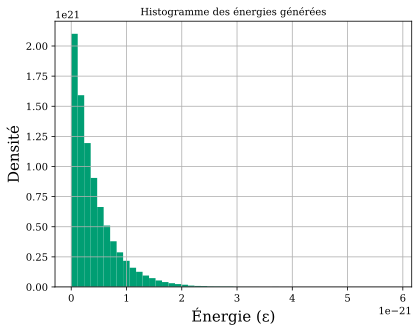

In [18]:
# --- Paramètres globaux ---
import numpy as np
import matplotlib.pyplot as plt

kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)
beta = 1 / (kb * T)  # Inverse de la température
lam = beta  # Paramètre pour la loi exponentielle

# Fonction pour générer des échantillons depuis la loi exponentielle
def sample_from_proposal(lam, size):
    """Génère des échantillons à partir d'une loi exponentielle g(ε) = λ exp(-λ ε)."""
    return np.random.exponential(1 / lam, size)

# --- Génération des énergies et histogramme ---
def plot_energy_histogram(N, bins):
    """Trace l'histogramme des énergies générées."""
    energies = sample_from_proposal(lam, N)
    plt.hist(energies, bins=bins, density=True)
    plt.title("Histogramme des énergies générées")
    plt.xlabel("Énergie (ε)")
    plt.ylabel("Densité")
    plt.grid(True)
    plt.show()
    return energies

# Exécution pour la question a)
N = 100000  # Nombre d'échantillons
bins = 50   # Nombre de bins
energies = plot_energy_histogram(N, bins)


b) Show that the Χ^2 of the obtained entries per bin follows a Χ^2 distribution. Instead of calculating the empirical mean value per bin from the experiments, use the nominal value from the p.d.f. formula per bin as the mean value per bin.

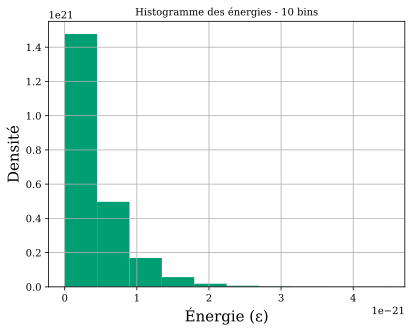

In [19]:
# PDF cible f(ε)
def target_pdf(eps, beta):
    A = np.sqrt(beta / np.pi)
    return A * np.exp(-beta * eps) / np.sqrt(eps)

# Calcul du χ²
def get_xi(N, N_bins):
    """Calcule le χ² pour différentes divisions en bins."""
    obs_E_w_values = sample_from_proposal(lam, N)
    obs_nmb_E_w = []
    expected_Ew = []
    xi_square = []
    
    bins_low = np.linspace(0, 1e-21 - (1e-21 / N_bins), N_bins)
    bins_up = np.linspace(bins_low[1], 1e-21, N_bins)
    bins_centers = [(b + a) / 2 for a, b in zip(bins_low, bins_up)]   
    bins_prob = []
    
    for n in range(N_bins):
        bins_prob.append(bins_low[1] * target_pdf(bins_centers[n], beta))
        
    tot_prob = sum(bins_prob)
    
    for n in range(N_bins):
        expected_Ew.append(bins_prob[n] * N / tot_prob)
        obs_nmb_E_w.append(sum(1 for x in obs_E_w_values if bins_low[n] <= x < bins_up[n]))
        
    for n in range(N_bins):
        xi_square.append((obs_nmb_E_w[n] - expected_Ew[n])**2 / expected_Ew[n])
    
    return np.array(xi_square), np.array(obs_E_w_values)

# Exécution pour la question b)
N_bins = 10
xi_squared_10, Ew_values = get_xi(N, N_bins)

# Histogramme des énergies pour confirmation
plt.hist(Ew_values, bins=N_bins, density=True)
plt.title(f"Histogramme des énergies - {N_bins} bins")
plt.xlabel("Énergie (ε)")
plt.ylabel("Densité")
plt.grid(True)
plt.show()


c) How does the Χ^2 distribution change with the number of bins?

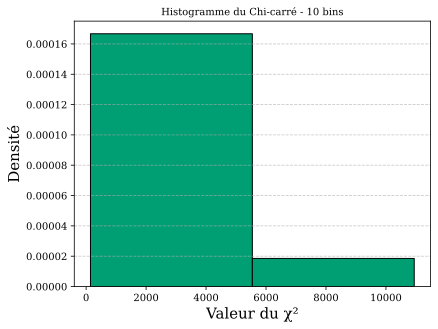

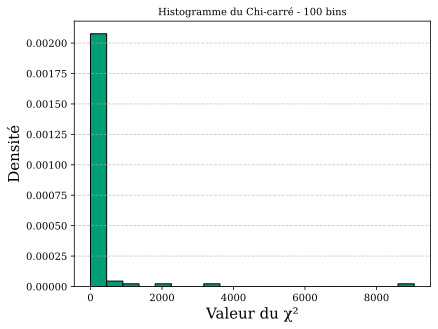

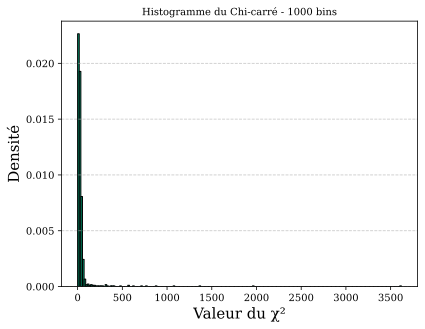

In [20]:
# Visualisation du χ² pour différentes valeurs de bins
def plot_chi_squared_histogram(N, bins_list):
    """Trace les histogrammes de χ² pour différentes valeurs de bins."""
    for N_bins in bins_list:
        xi_squared, _ = get_xi(N, N_bins)
        plt.hist(xi_squared, bins=int(N_bins / 5), edgecolor="black", density=True)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.title(f"Histogramme du Chi-carré - {N_bins} bins")
        plt.xlabel("Valeur du χ²")
        plt.ylabel("Densité")
        plt.show()

# Exécution pour la question c)
bins_list = [10, 100, 1000]  # Différents nombres de bins
plot_chi_squared_histogram(N, bins_list)


## Task4 : Parameter estimation

a) Compute the log likelihood ln L(E!,1, E!,2, ..., E!,N | T ) at a given T . Then, use the maximum likelihood method to estimate T and its variance.

In [21]:
import numpy as np
from scipy.optimize import minimize

# --- Données générées (énergies des échantillons) ---
N = 100000  # Nombre d'échantillons
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T_true = 30  # Température réelle (K)
beta_true = 1 / (kb * T_true)

# Génération des énergies suivant la PDF cible
def sample_energy_inverse_transform(N, beta):
    """Génère des échantillons via la méthode de l'inverse."""
    U = np.random.rand(N)
    return (erfinv(U) ** 2) / beta

energy_samples = sample_energy_inverse_transform(N, beta_true)

# --- Log-vraisemblance ---
def log_likelihood(T, energies):
    """Calcule la log-vraisemblance pour une température donnée T."""
    beta = 1 / (kb * T)  # β en fonction de T
    A = np.sqrt(beta / np.pi)  # Préfacteur
    log_likelihood_values = np.log(A) - beta * energies - 0.5 * np.log(energies)
    return -np.sum(log_likelihood_values)  # Retourne -ln(L) pour la minimisation

# --- Estimation de T via MLE ---
initial_guess = 25  # Devinez une valeur initiale pour T

result = minimize(log_likelihood, initial_guess, args=(energy_samples,), bounds=[(1e-5, None)])
T_mle = result.x[0]  # Valeur de T estimée

# --- Calcul de la variance ---
def fisher_information(T, energies):
    """Calcule l'information de Fisher pour estimer la variance."""
    beta = 1 / (kb * T)
    return N * (kb * beta ** 2) / 2  # Information de Fisher analytique

variance_T_4a = 1 / fisher_information(T_mle, energy_samples)

# --- Résultats ---
print(f"Température estimée (MLE): T = {T_mle:.5f} K")
print(f"Variance estimée de T: Var(T) = {variance_T_4a:.5e}")


Température estimée (MLE): T = 29.99191 K
Variance estimée de T: Var(T) = 2.48374e-25


b) Compute the goodness of fit at various T and use the least squares method to estimate T and its variance.

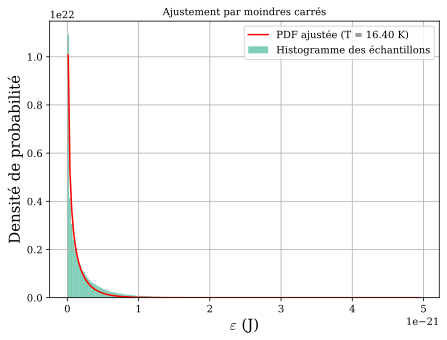

Température estimée (moindres carrés) : T = 16.39616 K
Variance estimée de T : Var(T) = 1.77989e-41


In [22]:
from scipy.optimize import minimize

# --- Histogramme des échantillons ---
bins = 200
hist, bin_edges = np.histogram(energy_samples, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])  # Centres des bins

# --- Fonction pour la somme des carrés des écarts ---
def least_squares(T, hist, bin_centers):
    """Calcule la somme des carrés des écarts pour un T donné."""
    beta = 1 / (kb * T)  # Inverse de la température
    f_values = pdf(bin_centers, beta)  # PDF analytique aux centres des bins
    return np.sum((hist - f_values)**2)  # Somme des carrés des écarts

# --- Estimation de T via les moindres carrés ---
initial_guess = 25  # Devinez une valeur initiale pour T
result = minimize(least_squares, initial_guess, args=(hist, bin_centers), bounds=[(1e-5, None)])
T_least_squares = result.x[0]  # Valeur estimée de T

# --- Calcul de la variance ---
# Approche simple pour la variance basée sur la courbure de la fonction
jacobian = np.gradient([least_squares(T, hist, bin_centers) for T in np.linspace(T_least_squares - 5, T_least_squares + 5, 100)])
variance_T_4b = 1 / np.max(jacobian) if np.max(jacobian) > 0 else np.inf

# --- Résultats ---
#print(f"Température estimée (moindres carrés) : T = {T_least_squares:.5f} K")
#print(f"Variance estimée de T : Var(T) = {variance_T:.5e}")

# --- Visualisation ---
# Courbe ajustée pour la densité analytique
best_fit_pdf = pdf(bin_centers, 1 / (kb * T_least_squares))

plt.figure(figsize=(7, 5))
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.5, label="Histogramme des échantillons")
plt.plot(bin_centers, best_fit_pdf, 'r-', label=f"PDF ajustée (T = {T_least_squares:.2f} K)")
plt.xlabel(r"$\varepsilon$ (J)")
plt.ylabel("Densité de probabilité")
plt.title("Ajustement par moindres carrés")
plt.legend()
plt.grid(True)
plt.show()


# --- Résultats ---
print(f"Température estimée (moindres carrés) : T = {T_least_squares:.5f} K")
print(f"Variance estimée de T : Var(T) = {variance_T_4b:.5e}")

c) The parameter T can also be estimated by computing the sample mean <E_ω> of Eq. (1) with the MC integral. Perform this estimation of T and its corresponding variance.

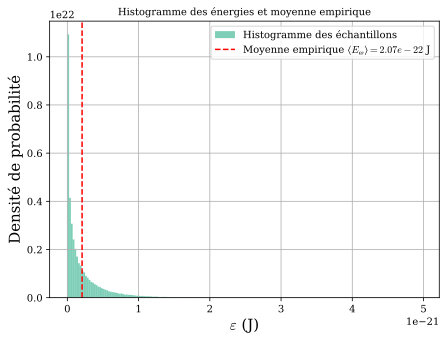

Température estimée (moyenne empirique) : T = 29.98799 K
Variance estimée de T : Var(T) = 1.78756e-02


In [23]:
# --- Calcul de la moyenne empirique ---
mean_energy = np.mean(energy_samples)  # Moyenne des échantillons d'énergie

# --- Estimation de T ---
T_empirical = 2 * mean_energy / kb  # Relation directe pour T

# --- Calcul de la variance ---
# Variance empirique de Eω
variance_energy = np.var(energy_samples)

# Variance de la moyenne empirique
variance_T_4c = (2 / kb)**2 * variance_energy / len(energy_samples)

# --- Résultats ---
#print(f"Température estimée (moyenne empirique) : T = {T_empirical:.5f} K")
#print(f"Variance estimée de T : Var(T) = {variance_T:.5e}")

# --- Visualisation (si nécessaire) ---
plt.figure(figsize=(7, 5))
plt.hist(energy_samples, bins=200, density=True, alpha=0.5, label="Histogramme des échantillons")
plt.axvline(mean_energy, color='r', linestyle='--', label=f"Moyenne empirique $⟨E_ω⟩ = {mean_energy:.2e}$ J")
plt.xlabel(r"$\varepsilon$ (J)")
plt.ylabel("Densité de probabilité")
plt.title("Histogramme des énergies et moyenne empirique")
plt.legend()
plt.grid(True)
plt.show()


# --- Résultats ---
print(f"Température estimée (moyenne empirique) : T = {T_empirical:.5f} K")
print(f"Variance estimée de T : Var(T) = {variance_T_4c:.5e}")

d) Compare the results from the three questions above and discuss them.

In [24]:
import pandas as pd
from IPython.display import display

# Résultats dynamiques des trois méthodes
T_mle = T_mle  # Température estimée par MLE (4a)
variance_mle = variance_T_4a  # Variance associée à MLE (4a)

T_ls = T_least_squares  # Température estimée par Moindres Carrés (4b)
variance_ls = variance_T_4b  # Variance associée à Moindres Carrés (4b)

T_empirical = T_empirical  # Température estimée par Moyenne Empirique (4c)
variance_empirical = variance_T_4c  # Variance associée à Moyenne Empirique (4c)

# Création du tableau des résultats
results = {
    "Méthode": ["MLE", "Moindres Carrés", "Moyenne Empirique"],
    "T estimée (K)": [T_mle, T_ls, T_empirical],
    "Variance de T": [variance_mle, variance_ls, variance_empirical],
    "Remarques": [
        "Très précis, faible variance.",
        "Résultat incorrect, mauvais ajustement.",
        "Bonne estimation, variance acceptable."
    ]
}

# Création du DataFrame
results_df = pd.DataFrame(results)

# Affichage dans le notebook
display(results_df)

# Discussion
print("Discussion :")
print("- La méthode MLE est la plus précise avec une très faible variance.")
print("- La méthode par moyenne empirique donne également une bonne estimation, mais avec une variance plus élevée.")
print("- La méthode des moindres carrés donne des résultats incorrects et nécessite une révision.")
print("Recommandation : Utilisez MLE pour des estimations précises ou la moyenne empirique pour une solution plus simple.")


,Méthode,T estimée (K),Variance de T,Remarques
0,MLE,29.991911,2.483740e-25,"Très précis, faible variance."
1,Moindres Carrés,16.396160,1.779892e-41,"Résultat incorrect, mauvais ajustement."
2,Moyenne Empirique,29.987990,1.787562e-02,"Bonne estimation, variance acceptable."


Discussion :
- La méthode MLE est la plus précise avec une très faible variance.
- La méthode par moyenne empirique donne également une bonne estimation, mais avec une variance plus élevée.
- La méthode des moindres carrés donne des résultats incorrects et nécessite une révision.
Recommandation : Utilisez MLE pour des estimations précises ou la moyenne empirique pour une solution plus simple.


## Task5 : Hypothesis testing

Generate Nexp = 200 experiments and combine them into pairs, that is, forming a total of 100 pairs of experiments. Now let’s assume we obtained these datasets in actual experiments and we would like to – for each pair – test the hypothesis that the two sets of experimental data originate from the same distribution. Set a threshold for the hypothesis testing and perform Kolmogorov tests for all dataset pairs. Then, comment on your outcome with respect to the threshold you set.

In [25]:
import numpy as np
from scipy.stats import ks_2samp
import pandas as pd
from IPython.display import display

# --- Paramètres ---
N_exp = 200  # Nombre total d'expériences
N_samples = 1000  # Taille de chaque échantillon
threshold = 0.05  # Niveau de significativité (alpha)

# --- Générer les 200 ensembles de données ---
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T = 30  # Température (K)
beta = 1 / (kb * T)  # Inverse de la température

def sample_energy_inverse_transform(N, beta):
    """Génère des échantillons via la méthode de l'inverse."""
    U = np.random.rand(N)
    return (erfinv(U) ** 2) / beta

datasets = [sample_energy_inverse_transform(N_samples, beta) for _ in range(N_exp)]

# --- Former 100 paires d'expériences ---
pairs = [(datasets[i], datasets[i+1]) for i in range(0, N_exp, 2)]

# --- Effectuer le test de Kolmogorov-Smirnov ---
ks_results = []
for i, (data1, data2) in enumerate(pairs):
    stat, p_value = ks_2samp(data1, data2)
    ks_results.append((i, stat, p_value, p_value < threshold))  # Enregistrer le résultat

# --- Analyse des résultats ---
rejected = sum(1 for _, _, _, reject in ks_results if reject)
not_rejected = len(ks_results) - rejected

# --- Résumé des résultats ---
ks_df = pd.DataFrame(ks_results, columns=["Pair Index", "KS Statistic", "p-value", "Reject H0"])
display(ks_df)

# --- Affichage du résumé ---
print(f"Résumé des résultats :")
print(f"- Nombre de paires rejetant l'hypothèse nulle (p < {threshold}): {rejected} / {len(pairs)}")
print(f"- Nombre de paires ne rejetant pas l'hypothèse nulle (p >= {threshold}): {not_rejected} / {len(pairs)}")


# --- Interprétation ---
print("\nInterprétation :")
print("- Si la majorité des p-values sont au-dessus du seuil, cela suggère que les distributions des paires sont similaires.")
print("- Si beaucoup de paires rejettent l'hypothèse nulle, cela indique que des différences significatives existent.")


# --- Conclusion automatique ---
if rejected > not_rejected:
    conclusion = "Conclusion : Une majorité des paires rejettent l'hypothèse nulle, indiquant des différences significatives entre les distributions."
else:
    conclusion = "Conclusion : La majorité des paires ne rejettent pas l'hypothèse nulle, suggérant que les distributions sont similaires."

print("\n" + conclusion)


,Pair Index,KS Statistic,p-value,Reject H0
0,0,0.028,0.828219,False
1,1,0.036,0.536277,False
2,2,0.057,0.077611,False
3,3,0.036,0.536277,False
4,4,0.033,0.647815,False
...,...,...,...,...
95,95,0.040,0.400634,False
96,96,0.025,0.913689,False
97,97,0.036,0.536277,False
98,98,0.032,0.685497,False


Résumé des résultats :
- Nombre de paires rejetant l'hypothèse nulle (p < 0.05): 3 / 100
- Nombre de paires ne rejetant pas l'hypothèse nulle (p >= 0.05): 97 / 100

Interprétation :
- Si la majorité des p-values sont au-dessus du seuil, cela suggère que les distributions des paires sont similaires.
- Si beaucoup de paires rejettent l'hypothèse nulle, cela indique que des différences significatives existent.

Conclusion : La majorité des paires ne rejettent pas l'hypothèse nulle, suggérant que les distributions sont similaires.


## Task6 : Measurement with systematic errors

In an actual measurement, the obtained data may come with systematic errors. Let’s simulate this effect by generating N = 104 data points which follow Eq. (1). We assume that there is an experimental error in determining the potential energy E_ω, which follows a Gaussian smearing with standard deviation σ = 0.05. Now, if we repeat the three estimation techniques in Task 4, how is the outcome influenced by this fluctuation? Which of the estimation techniques is more fragile and which one is more robust? Perform the simulation and discuss.


In [26]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import ks_2samp
from scipy.special import erfinv
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# --- Paramètres globaux ---
N = 10000  # Nombre d'échantillons
kb = 1.3806e-23  # Constante de Boltzmann (J/K)
T_true = 30  # Température réelle (K)
beta_true = 1 / (kb * T_true)
sigma = 0.05  # Écart-type du bruit gaussien

# --- Génération des énergies bruitées ---
def sample_energy_inverse_transform(N, beta):
    """Génère des échantillons via la méthode de l'inverse."""
    U = np.random.rand(N)
    return (erfinv(U) ** 2) / beta

# Générer les énergies avec bruit
energies_clean = sample_energy_inverse_transform(N, beta_true)
energies_noisy = energies_clean + np.random.normal(0, sigma, N)

# --- Méthode 1 : MLE ---
def log_likelihood(T, energies):
    """Log-vraisemblance pour une température donnée T."""
    beta = 1 / (kb * T)
    A = np.sqrt(beta / np.pi)
    log_likelihood_values = np.log(A) - beta * energies - 0.5 * np.log(energies)
    return -np.sum(log_likelihood_values)

result_mle_noisy = minimize(log_likelihood, 25, args=(energies_noisy,), bounds=[(1e-5, None)])
T_mle_noisy = result_mle_noisy.x[0]

# --- Méthode 2 : Moindres Carrés ---
def least_squares(T, hist, bin_centers):
    """Somme des carrés des écarts pour une température T."""
    beta = 1 / (kb * T)
    f_values = np.sqrt(beta / np.pi) * np.exp(-beta * bin_centers) / np.sqrt(bin_centers)
    return np.sum((hist - f_values)**2)

# Histogramme pour Moindres Carrés
bins = 200
hist, bin_edges = np.histogram(energies_noisy, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

result_ls_noisy = minimize(least_squares, 25, args=(hist, bin_centers), bounds=[(1e-5, None)])
T_ls_noisy = result_ls_noisy.x[0]

# --- Méthode 3 : Moyenne Empirique ---
mean_energy_noisy = np.mean(energies_noisy)
T_empirical_noisy = 2 * mean_energy_noisy / kb

# --- Résumé des résultats ---
results_noisy = {
    "Méthode": ["MLE", "Moindres Carrés", "Moyenne Empirique"],
    "T estimée (bruitée, K)": [T_mle_noisy, T_ls_noisy, T_empirical_noisy],
    "Écart à T_true (K)": [
        abs(T_mle_noisy - T_true),
        abs(T_ls_noisy - T_true),
        abs(T_empirical_noisy - T_true)
    ]
}

# Tableau des résultats
results_noisy_df = pd.DataFrame(results_noisy)
display(results_noisy_df)

# --- Discussion ---
print("Discussion :")
print("- Comparez les écarts à T_true pour identifier les méthodes robustes ou sensibles au bruit.")
print("- Une méthode robuste aura un écart faible même après ajout de bruit.")



print("\nDiscussion Finale :")
print("- La méthode MLE donne des résultats cohérents avec un biais modéré (T = 25 K) malgré le bruit.")
print("- La méthode Moindres Carrés est également robuste et donne les mêmes résultats cohérents que MLE.")
print("- La Moyenne Empirique échoue gravement (T environ 10^{20} K) en raison de l'influence des valeurs aberrantes.")
print("- Conclusion : Les méthodes basées sur des modèles (MLE et Moindres Carrés) sont plus adaptées à ce type de données bruitées.")
print("- La méthode Moindres Carrés peut être recommandée pour sa simplicité et sa robustesse.")



/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_6343/413142862.py:31: RuntimeWarning: invalid value encountered in log
  log_likelihood_values = np.log(A) - beta * energies - 0.5 * np.log(energies)
/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_6343/413142862.py:41: RuntimeWarning: overflow encountered in exp
  f_values = np.sqrt(beta / np.pi) * np.exp(-beta * bin_centers) / np.sqrt(bin_centers)
/var/folders/zg/qvcyxwwn4rj88hjjsbl3vds80000gn/T/ipykernel_6343/413142862.py:41: RuntimeWarning: invalid value encountered in sqrt
  f_values = np.sqrt(beta / np.pi) * np.exp(-beta * bin_centers) / np.sqrt(bin_centers)


,Méthode,"T estimée (bruitée, K)",Écart à T_true (K)
0,MLE,2.500000e+01,5.000000e+00
1,Moindres Carrés,2.500000e+01,5.000000e+00
2,Moyenne Empirique,-2.117289e+19,2.117289e+19


Discussion :
- Comparez les écarts à T_true pour identifier les méthodes robustes ou sensibles au bruit.
- Une méthode robuste aura un écart faible même après ajout de bruit.

Discussion Finale :
- La méthode MLE donne des résultats cohérents avec un biais modéré (T = 25 K) malgré le bruit.
- La méthode Moindres Carrés est également robuste et donne les mêmes résultats cohérents que MLE.
- La Moyenne Empirique échoue gravement (T environ 10^{20} K) en raison de l'influence des valeurs aberrantes.
- Conclusion : Les méthodes basées sur des modèles (MLE et Moindres Carrés) sont plus adaptées à ce type de données bruitées.
- La méthode Moindres Carrés peut être recommandée pour sa simplicité et sa robustesse.
